In [1]:
# se hace la conexión con google drive donde están los datos

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# se importán las principales librerías a utlizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# se llamaán a los datos

data = pd.read_csv('/content/drive/MyDrive/modulo 6/AAME.csv')
data

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,17-03-1980,3.85,0.00,15000,4.05,3.85,3.519899
1,18-03-1980,3.80,0.00,10250,4.00,3.80,3.474187
2,19-03-1980,3.85,0.00,33500,4.05,3.85,3.519899
3,20-03-1980,3.80,0.00,8750,4.00,3.80,3.474187
4,21-03-1980,3.75,0.00,12750,3.95,3.75,3.428474
...,...,...,...,...,...,...,...
10773,06-12-2022,2.66,2.70,2700,2.70,2.66,2.660000
10774,07-12-2022,2.70,2.73,700,2.73,2.70,2.700000
10775,08-12-2022,2.52,2.62,13800,2.69,2.59,2.590000
10776,09-12-2022,2.53,2.57,3600,2.58,2.57,2.570000


## Análisis exploratorio de los datos

In [4]:
data.isna().sum()  #verificamos si hay algún valot nulo y no los hay

,0
Date,0
Low,0
Open,0
Volume,0
High,0
Close,0
Adjusted Close,0


In [5]:
# vemos la correlación entre los datos numéricos

numeric_data = data.drop(['Date'], axis=1)
correlation = (numeric_data).corr()
correlation

,Low,Open,Volume,High,Close,Adjusted Close
Low,1.000000,0.117751,0.004717,0.996848,0.998917,0.997828
Open,0.117751,1.000000,0.014722,0.123984,0.124126,0.135873
Volume,0.004717,0.014722,1.000000,0.057415,0.012502,0.014887
High,0.996848,0.123984,0.057415,1.000000,0.998116,0.997431
Close,0.998917,0.124126,0.012502,0.998116,1.000000,0.999115
Adjusted Close,0.997828,0.135873,0.014887,0.997431,0.999115,1.000000


Text(0.5, 1.0, 'Mapa de correlación')

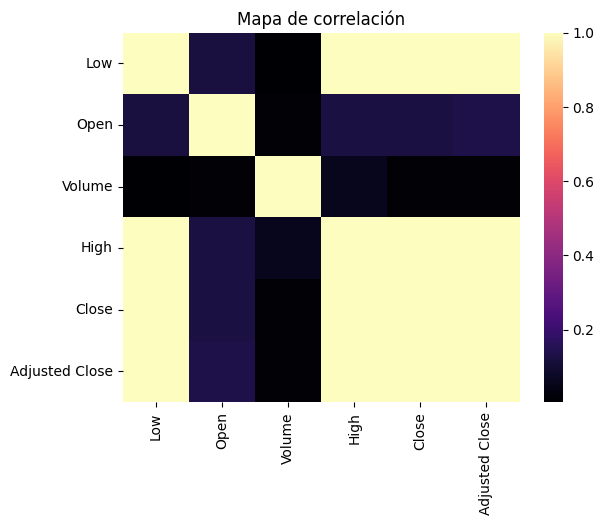

In [6]:
sns.heatmap( correlation, cmap='magma')  #gráficamos esa correlación
plt.title('Mapa de correlación')

<Axes: >

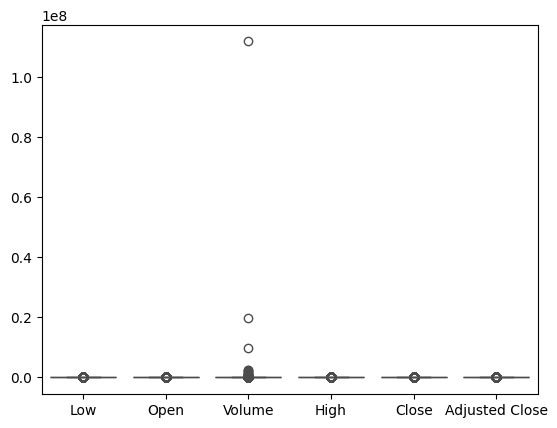

In [7]:
sns.boxplot(numeric_data, palette = ['#FF7F00', '#FFFF32', '#32FF00', '#19B2FF', '#654CFF', '#E51932']) #vemos la distribución de los datos con un diagrama de caja y se observa que la columna 'Value' parece que tiene unos 3 valores muy atipicos

In [8]:
numeric_data.describe() #realizamos una pequeña inspección a las columnas y para value, vemos que existe una gran desviación en la columna de 'Volume'

,Low,Open,Volume,High,Close,Adjusted Close
count,10778.000000,10778.000000,1.077800e+04,10778.000000,10778.000000,10778.000000
mean,3.475567,2.513294,2.430651e+04,3.608021,3.541222,3.285564
std,2.289100,1.755671,1.100144e+06,2.335151,2.301873,2.103832
min,0.375000,0.000000,0.000000e+00,0.437500,0.437500,0.399989
25%,2.000000,1.550000,1.100000e+03,2.125000,2.090000,1.942802
50%,2.910000,2.490000,3.500000e+03,3.010000,3.000000,2.742779
75%,4.020000,3.390000,9.500000e+03,4.150000,4.062500,3.844819
max,15.400000,13.800000,1.119128e+08,15.970000,15.800000,14.445302


In [9]:
# realizaremos una modificación que estén por encima del percentil 99, sustituyendoles por el valor del percintil 99
# de está manera aseguramos que estos valores tan atípicos no influyan de manera tán relevante en el modelo
# ahora podemos obeservar que ya la columna 'Value' no tiene una desviación tan grande

p1 = np.percentile(numeric_data['Volume'], 1)
p99 = np.percentile(numeric_data['Volume'], 99)
numeric_data['Volume'] = np.clip(numeric_data['Volume'], p1, p99)
numeric_data.describe()

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


,Low,Open,Volume,High,Close,Adjusted Close
count,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000
mean,3.475567,2.513294,8841.073854,3.608021,3.541222,3.285564
std,2.289100,1.755671,15877.004857,2.335151,2.301873,2.103832
min,0.375000,0.000000,0.000000,0.437500,0.437500,0.399989
25%,2.000000,1.550000,1100.000000,2.125000,2.090000,1.942802
50%,2.910000,2.490000,3500.000000,3.010000,3.000000,2.742779
75%,4.020000,3.390000,9500.000000,4.150000,4.062500,3.844819
max,15.400000,13.800000,108492.000000,15.970000,15.800000,14.445302


## construcción del modelo LSTM

In [10]:
# primero dividimos nuestros datos, como queremos predecir los valores de cierre, pues esa será nuestra columna y, las demás nuestra matriz X
# y después escalamos nuestros datos de un valor de 0 a 1

from sklearn.preprocessing import MinMaxScaler

X = numeric_data.drop(['Close'], axis=1)
y = numeric_data['Close'].copy()

scaler = MinMaxScaler()
close_scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)
close_scaled = close_scaler.fit_transform(y.values.reshape(-1,1))

scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data
close_scaled = pd.DataFrame(close_scaled, columns=['Close'])
close_scaled

,Close
0,0.222132
1,0.218877
2,0.222132
3,0.218877
4,0.215622
...,...
10773,0.144670
10774,0.147274
10775,0.140114
10776,0.138812


In [11]:
scaled_df = pd.concat([scaled_data, close_scaled], axis=1)

<Axes: >

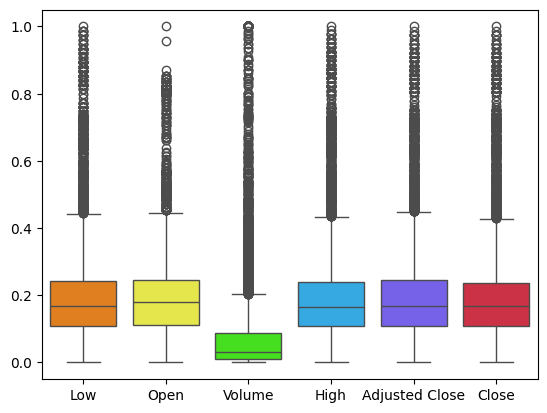

In [12]:
sns.boxplot(data=scaled_df, palette = ['#FF7F00', '#FFFF32', '#32FF00', '#19B2FF', '#654CFF', '#E51932'])

In [13]:
# hacemos la separación para la parte de prueba y entrenamiento

from sklearn.model_selection import train_test_split

X = scaled_data
y = close_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, shuffle=False)  #shuffle = False, importante para que no revuelva el orden de la serie temporal

In [14]:
# creamos las sequencias de tiempo necesarias para el modelo LSTM

def create_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X.iloc[i - time_steps:i].values)
        ys.append(y.iloc[i])
    return np.array(Xs), np.array(ys)

X_seq_train, y_seq_train = create_sequences(X_train, y_train, time_steps=60)
X_seq_test, y_seq_test = create_sequences(X_test, y_test, time_steps=60)


In [15]:
# creamos el modelo LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

n_steps = X_seq_train.shape[1]
n_features = X_seq_train.shape[2]

model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(n_steps, n_features)),  #return_sequences = True, para que devuelva la secuencia para las egunda capa y permita un aprenndizaje jeráquico
    Dropout(0.2),  #para evitar el sobreajuste, elimina el 20% de las conexiones
    LSTM(units=100, return_sequences=False, input_shape=(n_steps, n_features)), #return_sequences = False, como ya no hay otra capa, pues ya no es necesario que devuelva la secuencia
    Dense(1)
])


# Compilación del modelo

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error') # se eligió el optimizador Adam ya que es más eficaz para series temporales
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,901 (480.08 KB)

 Trainable params: 122,901 (480.08 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Entrenamiento del modelo

history = model.fit(
    X_seq_train, y_seq_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_seq_test, y_seq_test), # para detectar señales tempranas de sobreajuste
    verbose=1
)

Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0646 - val_loss: 2.7653e-04
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 3.7024e-04 - val_loss: 1.8481e-04
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 3.0483e-04 - val_loss: 2.1426e-04
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 2.5913e-04 - val_loss: 1.4270e-04
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 3.1767e-04 - val_loss: 3.2913e-04
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.1586e-04 - val_loss: 1.6300e-04
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 1.8931e-04 - val_loss: 4.2527e-04
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 2.0838e-04 - val_loss: 1.6723e-04
Epoch 9/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.0788e-04 - val_loss: 1.1769e-04
Epoch 10/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2.0917e-04 - val_loss: 2.6653e-04
Epoch 11/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

In [17]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

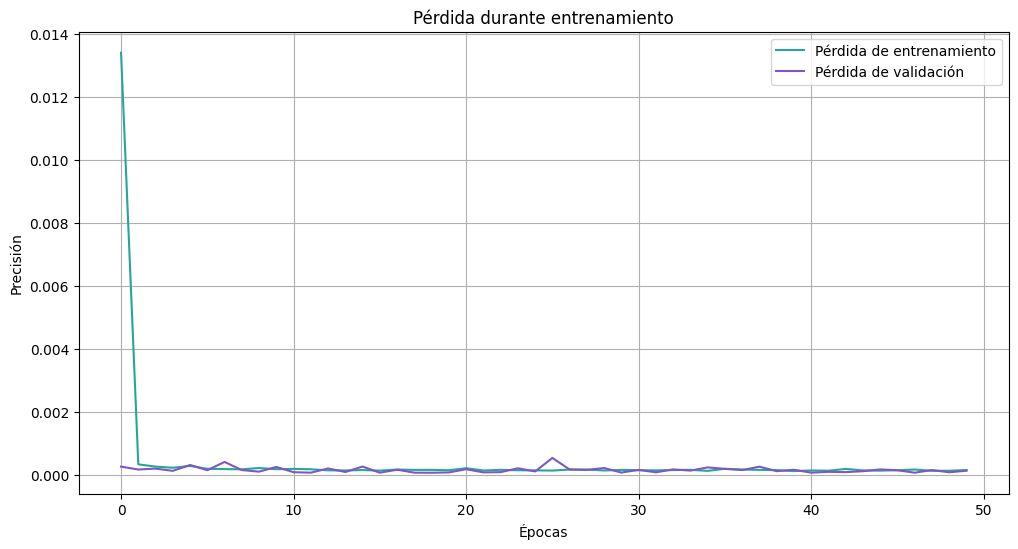

In [18]:
# vemos la pérdida que obtuvo el modelo durante las épocas

plt.figure(figsize=(12, 6))
plt.title('Pérdida durante entrenamiento')
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color = '#26A69A')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color = '#7E57C2')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid()
plt.legend()


In [19]:
# predicción que hace el modelo en base al conjunto X de prueba

y_pred_scaled = model.predict(X_seq_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [20]:
# deshacemos el escalado que se habai realizado con MinMaxScaler

y_pred = close_scaler.inverse_transform(y_pred_scaled)
y_true = close_scaler.inverse_transform(y_seq_test)

In [21]:
# definimos las métricas con las que vamos a evaluar el modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')


R²: 0.9421
RMSE: 0.1868
MAE: 0.1276


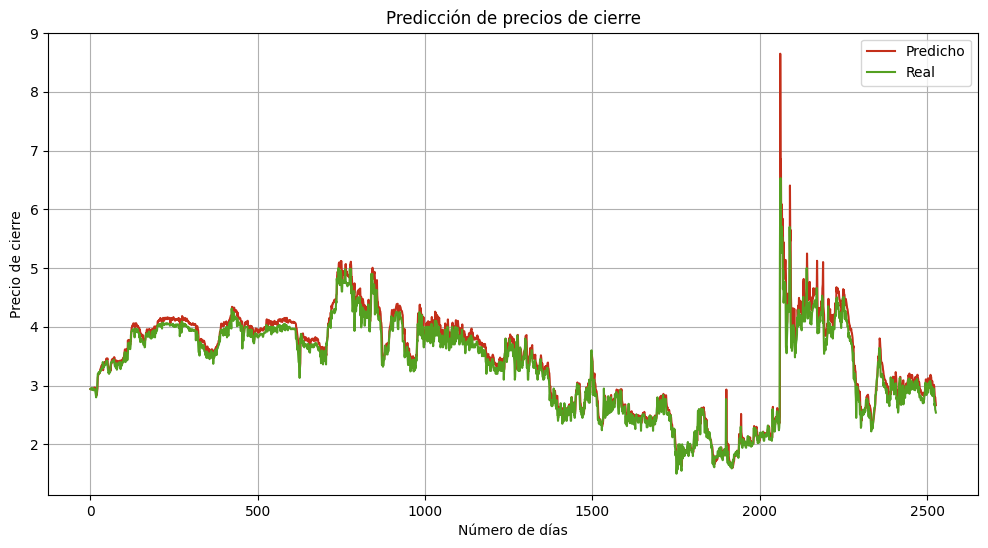

In [22]:
# Observamos la comparación visual entre los valores reales y los valores que predice el modelo

plt.figure(figsize=(12, 6))
plt.plot(y_pred, label='Predicho', color='#C42F1A')
plt.plot(y_true, label='Real', color='#54A021')
plt.title('Predicción de precios de cierre')
plt.xlabel('Número de días')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid()